In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/4251866737.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/4251866737.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([d.upper() for d in datasets], rotation=45)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/4251866737.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_speedup, x="Dataset", y="Speedup", palette="Blues_d", ax=axes[1])
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/4251866737.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_

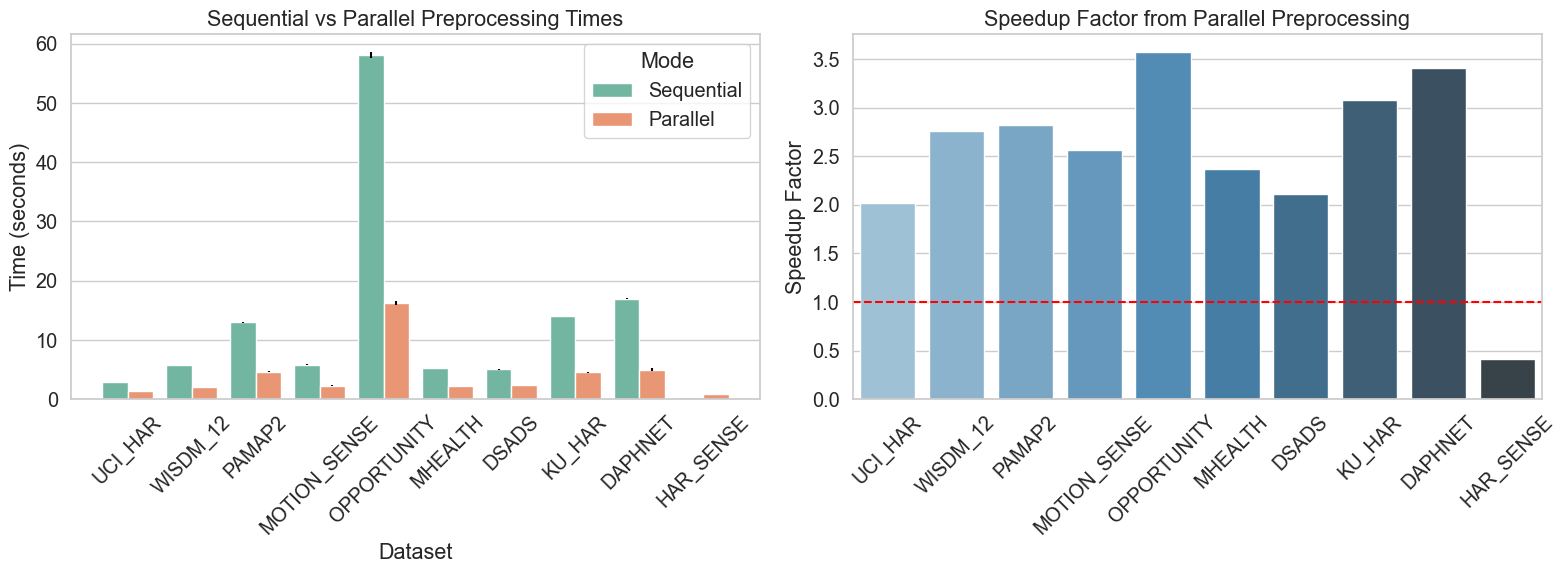

In [30]:
# Load JSON data
with open("sequential_times.json") as f:
    sequential = json.load(f)

with open("parallel_times.json") as f:
    parallel = json.load(f)

datasets = list(sequential.keys())

# Compute statistics
data = []
speedups = []

for ds in datasets:
    seq_times = np.array(sequential[ds])
    par_times = np.array(parallel[ds])

    seq_mean = seq_times.mean()
    par_mean = par_times.mean()

    seq_std = seq_times.std()
    par_std = par_times.std()

    speedup = seq_mean / par_mean

    data.append({"Dataset": ds, "Mode": "Sequential", "Mean": seq_mean, "Std": seq_std})
    data.append({"Dataset": ds, "Mode": "Parallel", "Mean": par_mean, "Std": par_std})

    speedups.append({"Dataset": ds, "Speedup": speedup})

# Convert to DataFrames
df_times = pd.DataFrame(data)
df_speedup = pd.DataFrame(speedups)

# Set style
sns.set(style="whitegrid", font_scale=1.3)  # Increase font scale

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Subplot 1: Time comparison ---
sns.barplot(
    data=df_times,
    x="Dataset",
    y="Mean",
    hue="Mode",
    ci=None,
    palette="Set2",
    capsize=0.1,
    ax=axes[0],
)
for i, row in df_times.iterrows():
    xpos = i // 2 + (-0.2 if row["Mode"] == "Sequential" else 0.2)
    axes[0].errorbar(x=xpos, y=row["Mean"], yerr=row["Std"], fmt="none", c="black")
axes[0].set_title("Sequential vs Parallel Preprocessing Times")
axes[0].set_ylabel("Time (seconds)")
axes[1].set_xlabel("")
axes[0].set_xticklabels([d.upper() for d in datasets], rotation=45)

# --- Subplot 2: Speedup ---
sns.barplot(data=df_speedup, x="Dataset", y="Speedup", palette="Blues_d", ax=axes[1])
axes[1].axhline(1, color="red", linestyle="--")
axes[1].set_title("Speedup Factor from Parallel Preprocessing")
axes[1].set_ylabel("Speedup Factor")
axes[1].set_xlabel("")
axes[1].set_xticklabels([d.upper() for d in datasets], rotation=45)


plt.tight_layout()
fig.savefig("preprocessing_times.pdf")
plt.show()

# save to pdf

In [2]:
# load json as dict
with open("sequential_times.json") as f:
    sequential = json.load(f)
with open("parallel_times.json") as f:
    parallel = json.load(f)
with open("session_sizes.json") as f:
    session_sizes = json.load(f)


/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/1537161315.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/1537161315.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df["Dataset"], rotation=30)


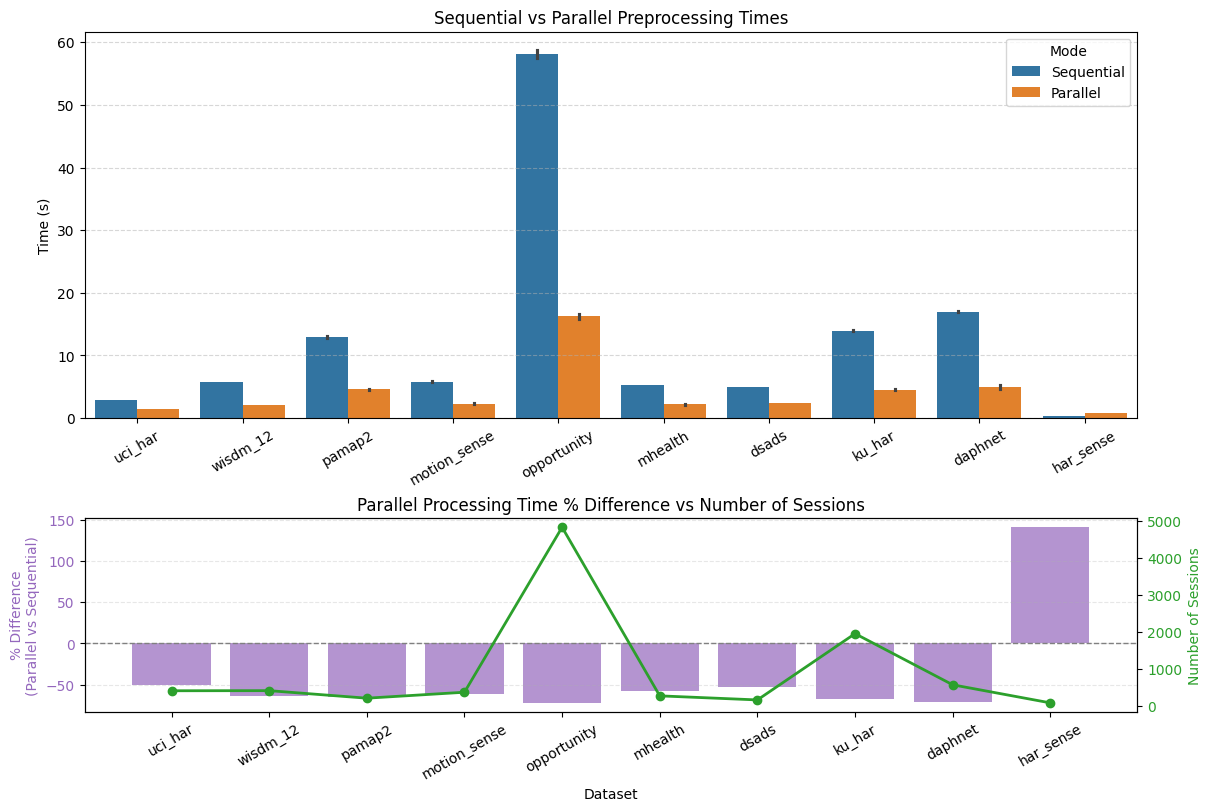

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    # % difference = (parallel - sequential) / sequential * 100
    pct_diff = ((par_avg - seq_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(12, 8),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
)

# Barplot Sequential vs Parallel times
sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
ax1.set_title("Sequential vs Parallel PrePreprocessing Times")
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=30)
ax1.legend(title="Mode")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# % Difference vs Session Count with twin y-axis
color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.7)
ax2.axhline(
    0, color="gray", linestyle="--", linewidth=1
)  # Reference line at 0% difference
ax2.set_ylabel("% Difference\n(Parallel vs Sequential)", color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.set_xticklabels(diff_df["Dataset"], rotation=30)
ax2.set_xlabel("Dataset")
ax2.grid(axis="y", linestyle="--", alpha=0.3)
ax2.set_title("Parallel Preprocessing Time % Difference vs Number of Sessions")

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("Number of Sessions", color=color2)
ax2b.tick_params(axis="y", labelcolor=color2)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/3720832522.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/3720832522.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df["Dataset"], rotation=30)


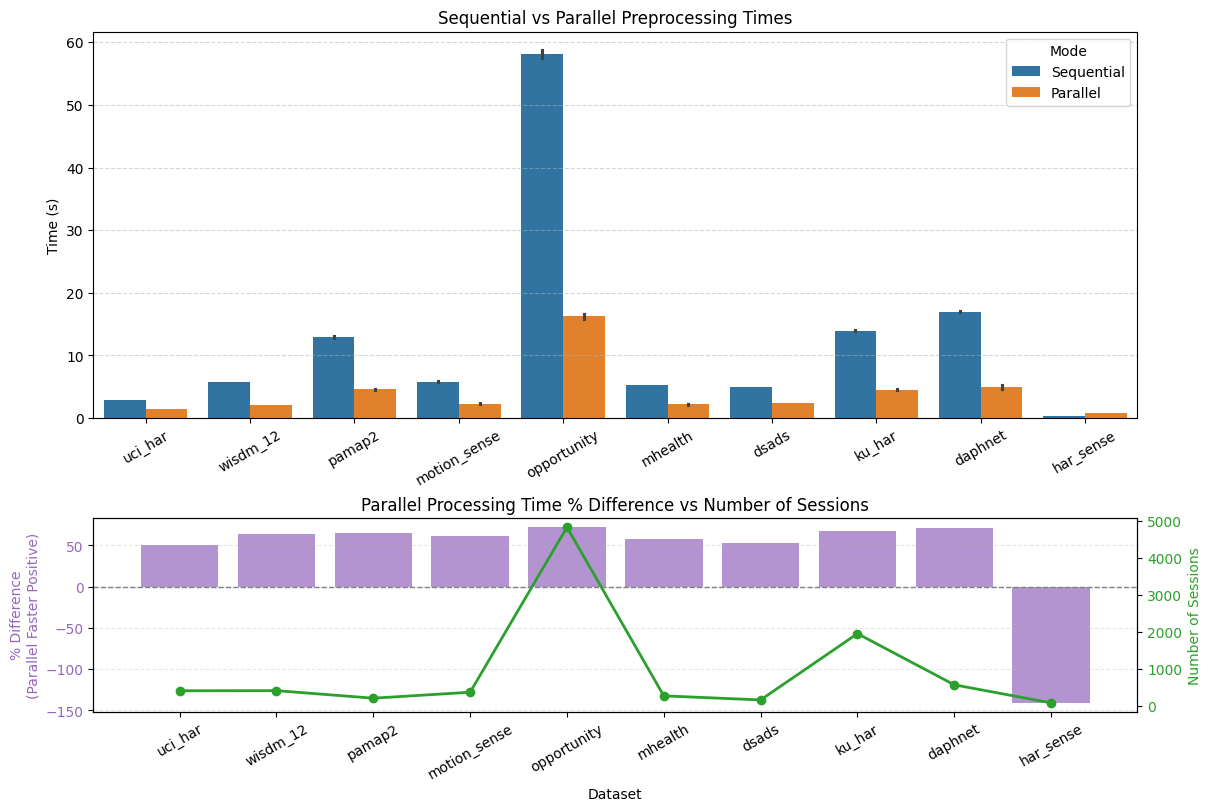

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate mirrored % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    # Mirrored % difference: positive means parallel faster
    pct_diff = ((seq_avg - par_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(12, 8),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
)

# Barplot Sequential vs Parallel times
sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
ax1.set_title("Sequential vs Parallel PrePreprocessing Times")
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=30)
ax1.legend(title="Mode")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# % Difference vs Session Count with twin y-axis
color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.7)
ax2.axhline(
    0, color="gray", linestyle="--", linewidth=1
)  # Reference line at 0% difference
ax2.set_ylabel("% Difference\n(Parallel Faster Positive)", color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.set_xticklabels(diff_df["Dataset"], rotation=30)
ax2.set_xlabel("Dataset")
ax2.grid(axis="y", linestyle="--", alpha=0.3)
ax2.set_title("Parallel Preprocessing Time % Difference vs Number of Sessions")

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("Number of Sessions", color=color2)
ax2b.tick_params(axis="y", labelcolor=color2)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/1940239058.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/1940239058.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)


50.42391995483702
63.82957354373521
64.50398650696683
60.93559629709403
72.04337274485532
57.85173299381342
52.56650378423701
67.46947007129356
70.67503119545255
-140.76996822908674


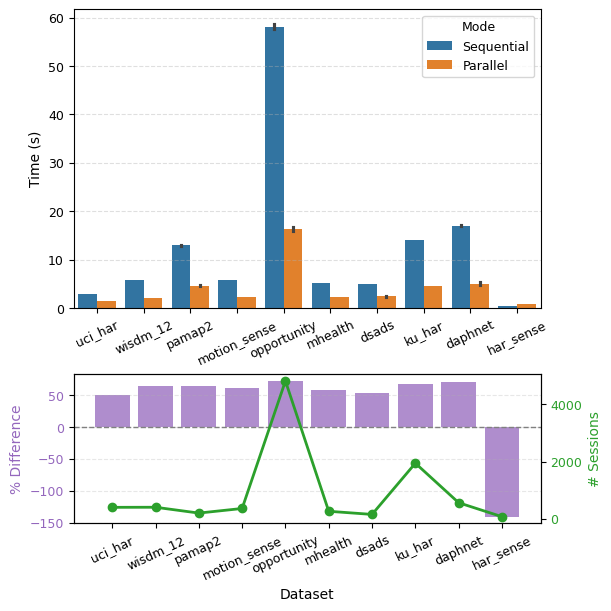

In [ ]:
# Prepare dataframe for sequential vs parallel times
records = []
for dataset in sequential:
    for t in sequential[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Sequential"})
    for t in parallel[dataset]:
        records.append({"Dataset": dataset, "Time (s)": t, "Mode": "Parallel"})

df = pd.DataFrame(records)

# Calculate mirrored % difference and session count
diff_data = []
for dataset in sequential:
    seq_avg = sum(sequential[dataset]) / len(sequential[dataset])
    par_avg = sum(parallel[dataset]) / len(parallel[dataset])
    pct_diff = ((seq_avg - par_avg) / seq_avg) * 100 if seq_avg != 0 else float("nan")
    print(pct_diff)
    session_count = len(session_sizes[dataset])
    diff_data.append(
        {"Dataset": dataset, "% Difference": pct_diff, "Session Count": session_count}
    )

diff_df = pd.DataFrame(diff_data)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(6, 6), gridspec_kw={"height_ratios": [2, 1]}, constrained_layout=True
)

# Set smaller font sizes
title_fs = 10
label_fs = 10
tick_fs = 9
legend_fs = 9

sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
# ax1.set_title("Sequential vs Parallel PrePreprocessing Times", fontsize=title_fs)
ax1.set_ylabel("Time (s)", fontsize=label_fs)
ax1.set_xlabel("")
ax1.tick_params(axis="x", rotation=25, labelsize=tick_fs)
ax1.tick_params(axis="y", labelsize=tick_fs)
ax1.legend(
    title="Mode", loc="upper right", fontsize=legend_fs, title_fontsize=legend_fs
)
ax1.grid(axis="y", linestyle="--", alpha=0.4)

color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.75)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1)
ax2.set_ylabel("% Difference", color=color1, fontsize=label_fs)
ax2.tick_params(axis="y", labelcolor=color1, labelsize=tick_fs)
ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)
ax2.set_xlabel("Dataset", fontsize=label_fs)
ax2.grid(axis="y", linestyle="--", alpha=0.3)
# ax2.set_title("Parallel Preprocessing Time % Difference vs Number of Sessions", fontsize=title_fs)

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("# Sessions", color=color2, fontsize=label_fs)
ax2b.tick_params(axis="y", labelcolor=color2, labelsize=tick_fs)

plt.show()

/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/770509441.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
/var/folders/tv/7xry7_k93931_p0d20mppzdc0000gn/T/ipykernel_5967/770509441.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)


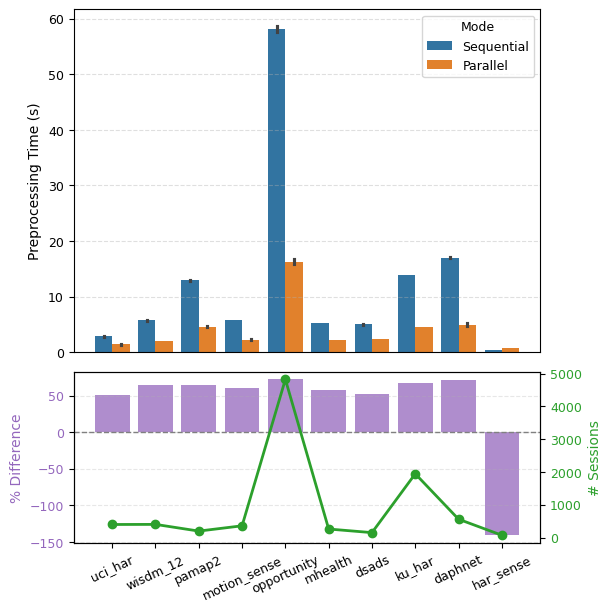

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    2,
    1,
    figsize=(6, 6),
    gridspec_kw={"height_ratios": [2, 1]},
    constrained_layout=True,
    sharex=True,  # share x-axis so ticks line up
)

# Set smaller font sizes
title_fs = 10
label_fs = 10
tick_fs = 9
legend_fs = 9

sns.barplot(data=df, x="Dataset", y="Time (s)", hue="Mode", ci="sd", ax=ax1)
# ax1.set_title("Sequential vs Parallel PrePreprocessing Times", fontsize=title_fs)
ax1.set_ylabel("PrePreprocessing Time (s)", fontsize=label_fs)
ax1.set_xlabel("")  # no x label here
ax1.tick_params(
    axis="x", which="both", bottom=False, labelbottom=False
)  # hide x ticks and labels on top plot
ax1.tick_params(axis="y", labelsize=tick_fs)
ax1.legend(
    title="Mode", loc="upper right", fontsize=legend_fs, title_fontsize=legend_fs
)
ax1.grid(axis="y", linestyle="--", alpha=0.4)

color1 = "tab:purple"
color2 = "tab:green"

ax2.bar(diff_df["Dataset"], diff_df["% Difference"], color=color1, alpha=0.75)
ax2.axhline(0, color="gray", linestyle="--", linewidth=1)
ax2.set_ylabel("% Difference", color=color1, fontsize=label_fs)
ax2.tick_params(axis="y", labelcolor=color1, labelsize=tick_fs)
ax2.set_xticklabels(diff_df["Dataset"], rotation=25, fontsize=tick_fs)
ax2.set_xlabel("")  # remove label here to avoid double label
ax2.grid(axis="y", linestyle="--", alpha=0.3)
# ax2.set_title("Parallel Preprocessing Time % Difference vs Number of Sessions", fontsize=title_fs)

ax2b = ax2.twinx()
ax2b.plot(
    diff_df["Dataset"], diff_df["Session Count"], color=color2, marker="o", linewidth=2
)
ax2b.set_ylabel("# Sessions", color=color2, fontsize=label_fs)
ax2b.tick_params(axis="y", labelcolor=color2, labelsize=tick_fs)

# Add one common x-axis label centered below both plots
# fig.text(0.5, 0.04, "Dataset", ha='center', fontsize=label_fs)

plt.show()